In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define Constants
g = 9.81  # Gravity (m/s^2)
m = 500 # Mass of the rocket (kg)
I = 250  # Moment of inertia (kg·m^2)
l1 = 2  # Longitudinal length between COG and FE (m)
l2 = 1  # Longitudinal length between COG and FS (m)
ln = 1.5  # Nozzle length (m)


In [4]:
# Control input constraints
FE_min, FE_max = 0, 6486
FS_min, FS_max = -130, 130
phi_min, phi_max = np.radians(-15), np.radians(15)

In [5]:
# Initial conditions
x0 = 0  # Initial horizontal position (m)
z0 = 0  # Initial vertical position (m)
vx0 = 0  # Initial horizontal velocity (m/s)
vz0 = -200  # Initial vertical velocity (m/s)
theta0 = 0  # Initial angle (rad)
omega0 = 0  # Initial angular velocity (rad/s)

In [6]:
# Target state for landing
target_x = 0  # Target horizontal position (m)
target_z = 0  # Target vertical position (m)
target_vx = 0  # Target horizontal velocity (m/s)
target_vz = 0  # Target vertical velocity (m/s)
target_theta = 0  # Target angle (rad)
target_omega = 0  # Target angular velocity (rad/s)

In [7]:
# State vector: [x, vx, z, vz, theta, omega]
initial_state = [x0, vx0, z0, vz0, theta0, omega0]


In [8]:
# Rocket dynamics
def rocket_dynamics(t, state, FE, FS, phi):
    x, vx, z, vz, theta, omega = state
    dxdt = vx
    dvxdt = (FE * np.sin(theta + phi) + FS) / m
    dzdt = vz
    dvzdt = (FE * np.cos(theta + phi) - m * g) / m
    dthetadt = omega
    domegadt = (l1 * FE * np.sin(phi) + l2 * FS) / I
    return [dxdt, dvxdt, dzdt, dvzdt, dthetadt, domegadt]


In [9]:
# Define a simple control law and strategy
def control_law(t, state):
    x, vx, z, vz, theta, omega = state
    FE = np.clip(0.1 * (target_z - z) - 0.5 * vz, FE_min, FE_max)
    FS = np.clip(-0.1 * x - 0.5 * vx, FS_min, FS_max)
    phi = np.clip(-0.1 * theta - 0.5 * omega, phi_min, phi_max)
    return FE, FS, phi

In [10]:
# Time span for the simulation
t_span = (0, 300)  # Simulate for 300 seconds
time_eval = np.linspace(0, 300, 1000)


In [11]:
# Function to integrate the system with control inputs
def controlled_rocket_dynamics(t, state):
    FE, FS, phi = control_law(t, state)
    return rocket_dynamics(t, state, FE, FS, phi)

In [12]:
# Solve ODE
solution = solve_ivp(controlled_rocket_dynamics, t_span, initial_state, t_eval=time_eval, max_step=0.1)

In [13]:
# Extract results
x_sol, vx_sol, z_sol, vz_sol, theta_sol, omega_sol = solution.y

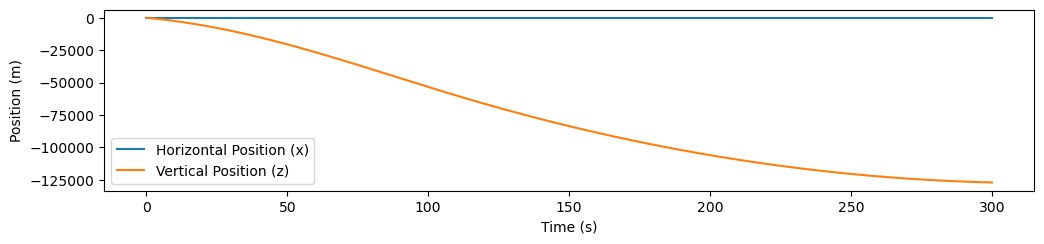

In [14]:
# Plot results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(solution.t, x_sol, label='Horizontal Position (x)')
plt.plot(solution.t, z_sol, label='Vertical Position (z)')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

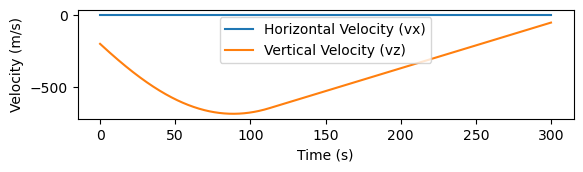

In [15]:
plt.subplot(3, 1, 2)
plt.plot(solution.t, vx_sol, label='Horizontal Velocity (vx)')
plt.plot(solution.t, vz_sol, label='Vertical Velocity (vz)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()

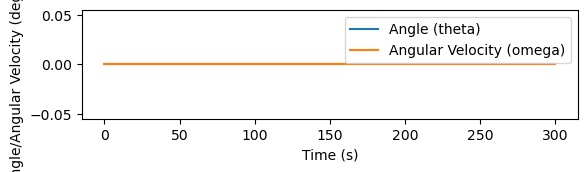

In [16]:
plt.subplot(3, 1, 3)
plt.plot(solution.t, np.degrees(theta_sol), label='Angle (theta)')
plt.plot(solution.t, np.degrees(omega_sol), label='Angular Velocity (omega)')
plt.xlabel('Time (s)')
plt.ylabel('Angle/Angular Velocity (deg/deg/s)')
plt.legend()

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>